In [1]:
import pandas as pd

# Load the dataset 
df = pd.read_csv("Sepsis.csv")

# Calculate the mean values for the columns with missing data for the main variables in predicting sepsis
mean_temp = df['Temp'].mean()
mean_sbp = df['SBP'].mean()
mean_dbp = df['DBP'].mean()
mean_resp = df['Resp'].mean()
mean_o2sat = df['O2Sat'].mean()
mean_map = df['MAP'].mean()
mean_hr = df['HR'].mean()

# Fill in missing values with the corresponding mean values
df['Temp'].fillna(mean_temp, inplace=True)
df['SBP'].fillna(mean_sbp, inplace=True)
df['DBP'].fillna(mean_dbp, inplace=True)
df['Resp'].fillna(mean_resp, inplace=True)
df['O2Sat'].fillna(mean_o2sat, inplace=True)
df['MAP'].fillna(mean_map, inplace=True)
df['HR'].fillna(mean_hr, inplace=True)

# limit to one decimal place to these variables
columns_to_limit = ['SBP', 'DBP', 'Resp', 'O2Sat', 'MAP', 'HR']

# Limit values to one decimal place in specified columns
df[columns_to_limit] = df[columns_to_limit].round(1)

# Save the updated dataset to a new CSV file
df.to_csv("filled_patient_data.csv", index=False)

In [2]:
import pandas as pd

# Load the dataset 
df = pd.read_csv("Sepsis.csv")

# Calculate the mean values for the columns with missing data
mean_temp = df['Temp'].mean()
mean_sbp = df['SBP'].mean()
mean_dbp = df['DBP'].mean()
mean_resp = df['Resp'].mean()
mean_o2sat = df['O2Sat'].mean()
mean_map = df['MAP'].mean()
mean_hr = df['HR'].mean()

# Fill in missing values with the corresponding mean values
df['Temp'].fillna(mean_temp, inplace=True)
df['SBP'].fillna(mean_sbp, inplace=True)
df['DBP'].fillna(mean_dbp, inplace=True)
df['Resp'].fillna(mean_resp, inplace=True)
df['O2Sat'].fillna(mean_o2sat, inplace=True)
df['MAP'].fillna(mean_map, inplace=True)
df['HR'].fillna(mean_hr, inplace=True)

# Round all numbers to one decimal place in the entire DataFrame
df = df.round(1)

# Save the updated dataset to a new CSV file
df.to_csv("filled_patient_data.csv", index=False)

In [3]:
import pandas as pd
import random

# Load the filled dataset into a DataFrame
df = pd.read_csv("filled_patient_data.csv")

# Get a list of unique PatientIDs
unique_patient_ids = df['Patient_ID'].unique()

# Create a new DataFrame to store the randomly selected rows
random_selected_df = pd.DataFrame(columns=df.columns)

# Randomly select one row for each unique PatientID
for patient_id in unique_patient_ids:
    patient_rows = df[df['Patient_ID'] == patient_id]
    random_row = patient_rows.sample(n=1, random_state=random.seed())
    random_selected_df = pd.concat([random_selected_df, random_row])

# Save the dataset with one unique PatientID per row
random_selected_df.to_csv("unique_patient_data.csv", index=False)


C:\Users\nicho\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Accuracy: 0.9801254082922061
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    205582
           1       0.21      0.00      0.01      4133

    accuracy                           0.98    209715
   macro avg       0.60      0.50      0.50    209715
weighted avg       0.97      0.98      0.97    209715



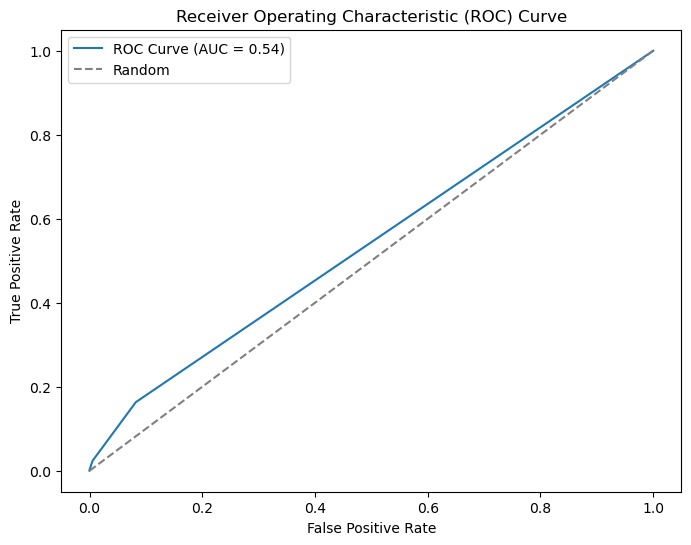

AUC: 0.5411412487161521


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt



# Define features and target variable
features = ['HR', 'MAP', 'SBP', 'DBP', 'O2Sat', 'Temp', 'Resp']
target = 'SepsisLabel' 
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize the KNN model with a specified number of neighbors (e.g., n_neighbors=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Calculate ROC-AUC
y_prob = knn_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Create ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Print AUC
print("AUC:", roc_auc)


C:\Users\nicho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9680870688064933
Confusion Matrix:
 [[5248    0]
 [ 173    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5248
           1       0.00      0.00      0.00       173

    accuracy                           0.97      5421
   macro avg       0.48      0.50      0.49      5421
weighted avg       0.94      0.97      0.95      5421



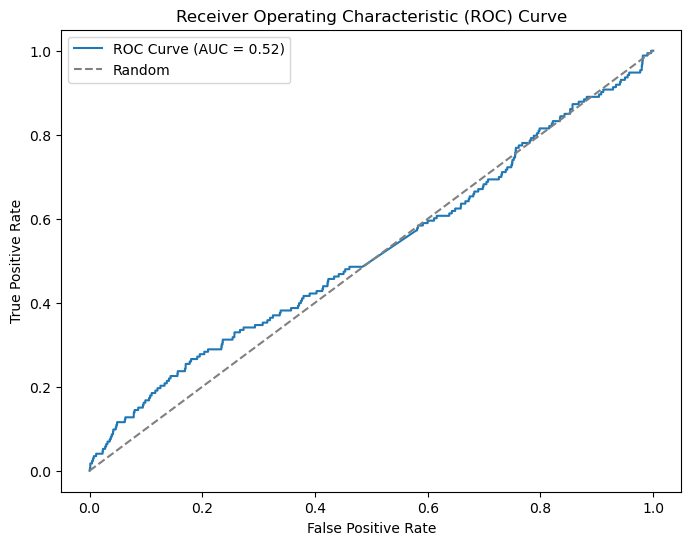

AUC: 0.5193775993937685


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv('unique_patient_data.csv')

# Define features and target variable
features = ['HR', 'MAP', 'SBP', 'DBP', 'O2Sat', 'Temp', 'Resp']
target = 'SepsisLabel' 
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Standardize features (optional but recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

# Predict probabilities for the positive class (class 1)
y_prob = svm_model.decision_function(X_test)

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Create ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Print AUC
print("AUC:", roc_auc)



In [6]:
import scipy.stats as stats

# Lists of performance metrics for each model
svm_metrics = [0.55]  
logistic_metrics = [0.61]  
knn_metrics = [0.54]  

# Perform the Wilcoxon signed-rank test for SVM vs. Logistic Regression
svm_vs_logistic, p_value_sl = stats.wilcoxon(svm_metrics, logistic_metrics)

# Perform the Wilcoxon signed-rank test for SVM vs. KNN
svm_vs_knn, p_value_sk = stats.wilcoxon(svm_metrics, knn_metrics)

# Perform the Wilcoxon signed-rank test for Logistic Regression vs. KNN
logistic_vs_knn, p_value_lk = stats.wilcoxon(logistic_metrics, knn_metrics)

# Set the significance level (alpha)
alpha = 0.05

# Compare SVM vs. Logistic Regression
if p_value_sl < alpha:
    print("SVM and Logistic Regression have significantly different performance.")
else:
    print("SVM and Logistic Regression do not have significantly different performance.")

# Compare SVM vs. KNN
if p_value_sk < alpha:
    print("SVM and KNN have significantly different performance.")
else:
    print("SVM and KNN do not have significantly different performance.")

# Compare Logistic Regression vs. KNN
if p_value_lk < alpha:
    print("Logistic Regression and KNN have significantly different performance.")
else:
    print("Logistic Regression and KNN do not have significantly different performance.")


SVM and Logistic Regression do not have significantly different performance.
SVM and KNN do not have significantly different performance.
Logistic Regression and KNN do not have significantly different performance.


KNN Accuracy: 0.967718133185759
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5248
           1       0.00      0.00      0.00       173

    accuracy                           0.97      5421
   macro avg       0.48      0.50      0.49      5421
weighted avg       0.94      0.97      0.95      5421



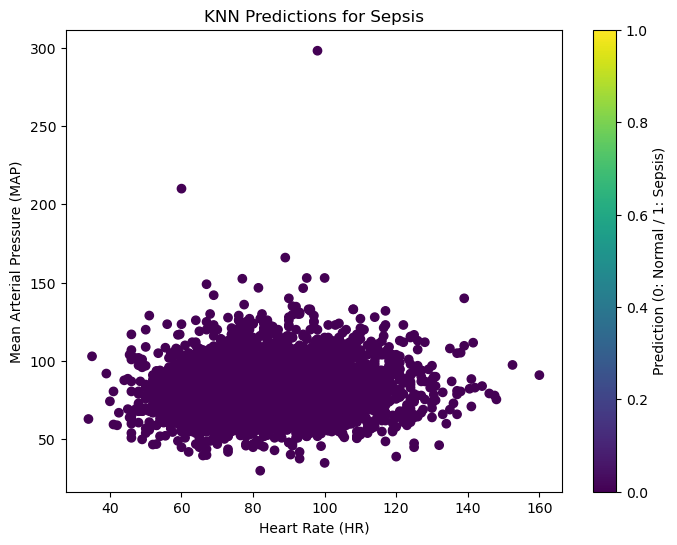

In [7]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load your dataset (assuming you have a DataFrame named 'df')
# Preprocess your data as needed (e.g., handle missing values)

# Define features and target variable
features = ['HR', 'MAP', 'SBP', 'DBP', 'O2Sat', 'Temp', 'Resp']
target = 'SepsisLabel' 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the KNN model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("KNN Accuracy:", accuracy)
print("KNN Classification Report:\n", classification_rep)

# Visualize the KNN predictions using a scatter plot (e.g., HR vs. MAP)
plt.figure(figsize=(8, 6))
plt.scatter(X_test['HR'], X_test['MAP'], c=y_pred, cmap='viridis')
plt.xlabel('Heart Rate (HR)')
plt.ylabel('Mean Arterial Pressure (MAP)')
plt.title('KNN Predictions for Sepsis')
plt.colorbar(label='Prediction (0: Normal / 1: Sepsis)')
plt.show()



KNN Accuracy: 0.9673491975650249
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5248
           1       0.17      0.01      0.01       173

    accuracy                           0.97      5421
   macro avg       0.57      0.50      0.50      5421
weighted avg       0.94      0.97      0.95      5421



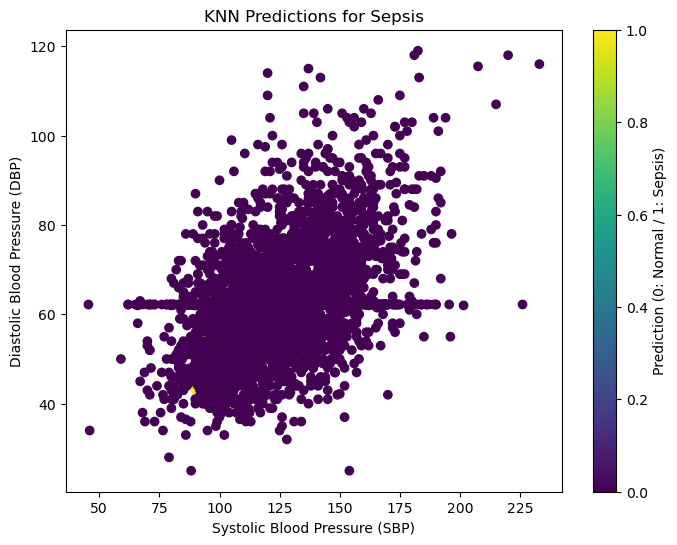

In [8]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load your dataset (assuming you have a DataFrame named 'df')
# Preprocess your data as needed (e.g., handle missing values)

# Define features and target variable
features = ['SBP', 'DBP', 'O2Sat', 'Temp', 'Resp']  
target = 'SepsisLabel' 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the KNN model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("KNN Accuracy:", accuracy)
print("KNN Classification Report:\n", classification_rep)

# Visualize the KNN predictions using a scatter plot (e.g., SBP vs. DBP)
plt.figure(figsize=(8, 6))
plt.scatter(X_test['SBP'], X_test['DBP'], c=y_pred, cmap='viridis')
plt.xlabel('Systolic Blood Pressure (SBP)')
plt.ylabel('Diastolic Blood Pressure (DBP)')
plt.title('KNN Predictions for Sepsis')
plt.colorbar(label='Prediction (0: Normal / 1: Sepsis)')
plt.show()


